# Random Walks
### Niccolo Perrone

In [1]:
# Importing the necessary packages
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import jv, comb, gamma
import scipy.integrate as integrate
import scipy.stats as stats
import scipy.optimize as opt

In [2]:
rng = np.random.default_rng()

def lattice(v, N):
    '''
    Returns the cumulative sum of the directions taken by the walker

            Parameters:
                    vecs (array): Array of possible vectors
                    N (int): Number of steps

            Returns:
                    position (array): Array containing the walker's position at each step
    '''
    val = rng.choice(v, N) 
    position = np.cumsum(val,axis=0) 
    return position

# 1-D Lattice

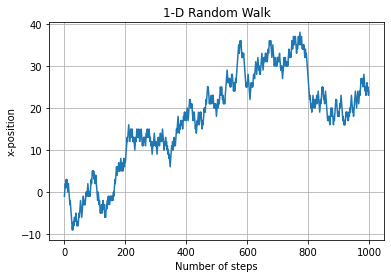

In [3]:
# Generating a 1-D random walk and plotting it
d1 = lattice([[1,0],[-1,0]], 1000)
x_d1 = np.array(d1[:,0])
plt.plot(range(1000),x_d1)
plt.grid()
plt.title("1-D Random Walk") 
plt.xlabel("Number of steps")
plt.ylabel("x-position")
plt.show()

In [4]:
def distance(x, y, P):
    '''
    Computes the distance between points P steps apart

            Parameters:
                    x (array): Array of x positions
                    y (array): Array of y positions
                    P (int): Step-length

            Returns:
                    dist_p (array): Array containing the distances
    '''
    x_s = np.roll(x, -P)
    y_s = np.roll(y, -P)
    dist_p = (np.sqrt((x_s-x)**2+(y_s-y)**2))[:len(x)-P]
    return dist_p

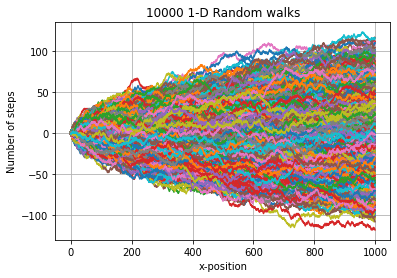

In [5]:
his = [] # List containing the distances from the origin
N = 1000

# Running 10000 1-D RWs with 1000 steps
for t in range(10000):
    d1 = lattice([[1,0],[-1,0]], N)
    x_d1 = np.array(d1[:,0])
    his.append(x_d1[-1]) # Appending the distances
    plt.plot(range(N),x_d1)

plt.grid()
plt.title("10000 1-D Random walks") 
plt.xlabel("x-position")
plt.ylabel("Number of steps")
plt.show()

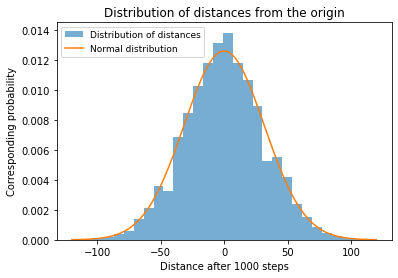

In [6]:
# Plotting the probability distribution of the found distances
plt.hist(his, bins=30, density=True, alpha=0.6, label="Distribution of distances") 
lin = np.linspace(-120, 120, N)
plt.plot(lin, stats.norm.pdf(lin, scale=np.sqrt(N)), label="Normal distribution") # Plotting a normal distribution with a variance of sqrt(N)
plt.title("Distribution of distances from the origin") 
plt.xlabel("Distance after 1000 steps")
plt.ylabel("Corresponding probability")
plt.legend(loc="upper left",prop={'size': 9})
plt.show()

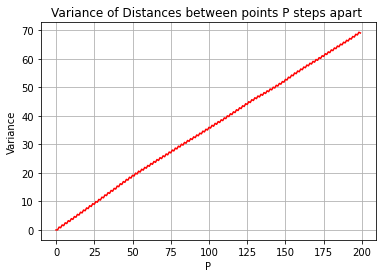

In [7]:
P = 200 
d1 = lattice([[1,0],[-1,0]],100000)
x_d1 = np.array(d1[:,0])
y_d1 = np.array(d1[:,1])
variances = []
js = []

# Calculating the variance of the distances for different step-lengths
for j in range(P):
    varr = np.var(distance(x_d1, y_d1, j))
    variances.append(varr)

plt.plot(range(P),variances,'r')
plt.title("Variance of Distances between points P steps apart ") 
plt.xlabel("P")
plt.ylabel("Variance")
plt.grid()
plt.show()

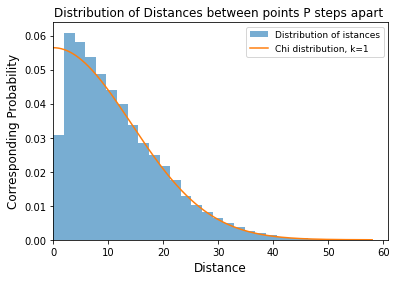

In [8]:
P = 200
d1 = lattice([[1,0],[-1,0]],100000)
x_d1 = np.array(d1[:,0])
y_d1 = np.array(d1[:,1])
ds = distance(x_d1, y_d1, P)

# Plotting the distribution of distances
plt.hist(ds, bins=30, density=True, alpha=0.6, label="Distribution of istances")

# Plotting the rescaled the PDF of the Chi distribution with 1 dof 
lin = np.linspace(0, np.max(ds),len(ds))
plt.plot(lin, stats.chi.pdf(lin/np.sqrt(P), 1)/np.sqrt(P), label="Chi distribution, k=1")
plt.title("Distribution of Distances between points P steps apart ") 
plt.xlabel("Distance",fontsize=12)
plt.ylabel("Corresponding Probability",fontsize=12)
plt.legend(loc="upper right",prop={'size': 9})
plt.xlim(0)
plt.show()

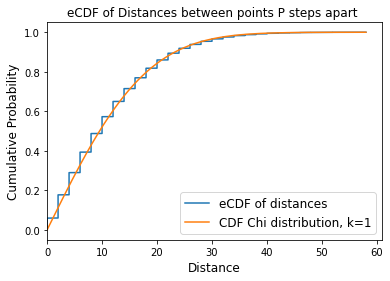

In [9]:
ds = np.sort(ds) # Sorting the distances
ecdf = np.arange(len(ds))/float(len(ds)) # Finding the corresponding eCDF values
plt.plot(ds, ecdf, label="eCDF of distances")

# Plotting the rescaled CDF of the Chi distribution with 1 dof 
lin = np.linspace(0,np.max(ds),len(ds))
plt.plot(lin, stats.chi.cdf(lin, 1, scale=np.sqrt(P)), label="CDF Chi distribution, k=1") 
plt.title("eCDF of Distances between points P steps apart ") 
plt.xlabel("Distance",fontsize=12)
plt.ylabel("Cumulative Probability",fontsize=12)
plt.legend(loc="lower right",prop={'size': 12})
plt.xlim(0)
plt.show()

# 2-D Lattice

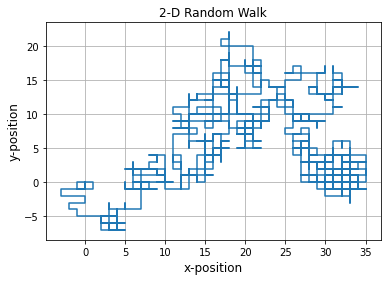

In [10]:
 # Generating a 2-D random walk and plotting it
d2 = lattice([[1,0],[-1,0],[0,1],[0,-1]],1000)
x_d2 = np.array(d2[:,0])
y_d2 = np.array(d2[:,1])
plt.plot(x_d2,y_d2)
plt.title("2-D Random Walk") 
plt.xlabel("x-position", fontsize=12)
plt.ylabel("y-position", fontsize=12)
plt.grid()
plt.show()

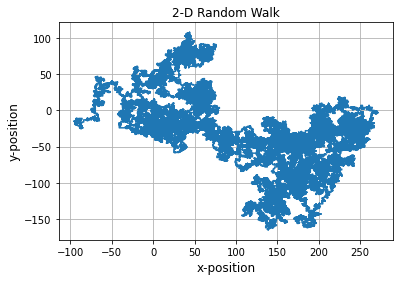

In [11]:
d2 = lattice([[1,0],[-1,0],[0,1],[0,-1]],100000)
x_d2 = np.array(d2[:,0])
y_d2 = np.array(d2[:,1])
plt.plot(x_d2,y_d2)
plt.grid()
plt.title("2-D Random Walk") 
plt.xlabel("x-position", fontsize=12)
plt.ylabel("y-position", fontsize=12)
plt.show()

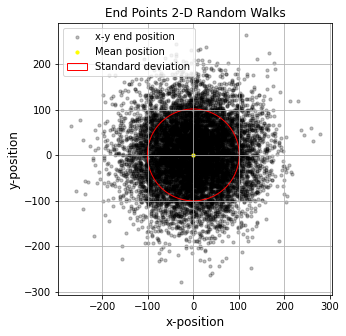

In [12]:
xs = []
ys = []
# Appending the x and y final positions of 10000 RWs
for t in range(10000):  
    d2 = lattice([[1,0],[-1,0],[0,1],[0,-1]],10000)
    x_d2 = np.array(d2[:,0])[-1]
    y_d2 = np.array(d2[:,1])[-1]
    xs.append(x_d2) 
    ys.append(y_d2)

# Calculating the variance of the final positions
varx = np.var(xs)
vary = np.var(ys)
covxy = np.cov(xs, ys)[:,0][1]
varxy = varx + vary + 2*covxy

# Implementing some features for the plot
fig = plt.gcf()
fig.set_size_inches(5, 5)
ax = plt.gca()
ax.cla()
plt.grid()

# Plotting the final positions, the mean and a cirle with radius equal to the std deviation
plt.scatter(xs, ys, s=10, c='black', alpha=.25, label="x-y end position")
plt.scatter(np.mean(xs), np.mean(ys), s=10, c='yellow', alpha=1, label="Mean position")
circle = plt.Circle((np.mean(xs), np.mean(ys)), np.sqrt(np.abs(varxy)), color='red',  fill=False, label="Standard deviation")
ax.add_patch(circle)
ax.set_aspect('equal')
plt.title("End Points 2-D Random Walks") 
plt.xlabel("x-position", fontsize=12)
plt.ylabel("y-position", fontsize=12)
plt.legend(loc="upper left",prop={'size': 10})
plt.show()

In [13]:
def Rayleigh(N, r):
    return 2*r/N*np.exp(-r**2/N), np.sqrt(N*np.pi/4), 1-np.exp(-r**2/N) # Returning the PDF of Rayleigh, its variance and its CDF

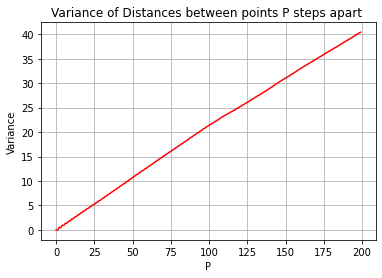

nan


C:\Users\joing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\joing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
P = 200
d2 = lattice([[1,0],[-1,0],[0,1],[0,-1]],100000)
x_d2 = np.array(d2[:,0])
y_d2 = np.array(d2[:,1])
variances = []
js = []

# Calculating the variance of the distances for different step-lengths
for j in range(P):
    varr = np.var(distance(x_d2, y_d2, j))
    variances.append(varr)
    
plt.plot(range(P),variances,'r')
plt.title("Variance of Distances between points P steps apart ") 
plt.xlabel("P")
plt.ylabel("Variance")
plt.grid()
plt.show()

# Finding the constant of proportionality between scale parameter and P
C = (2/(4-np.pi))*np.mean(js)
print(C)

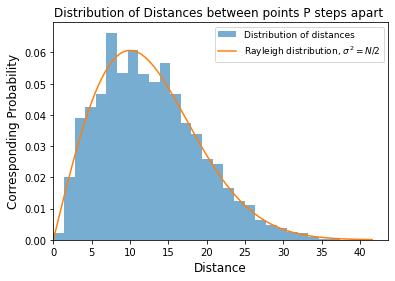

In [15]:
P = 200
d2 = lattice([[1,0],[-1,0],[0,1],[0,-1]],100000)
x_d2 = np.array(d2[:,0])
y_d2 = np.array(d2[:,1])
ds = distance(x_d2, y_d2, P)
lin = np.linspace(0,np.max(ds),P)

# Plotting the distribution of distances
plt.hist(ds, bins=30, density=True, alpha=0.6, label="Distribution of distances") 

# Plotting the PDF of the Rayleigh distribution
lin = np.linspace(0,np.max(ds),P)
plt.plot(lin, Rayleigh(P,lin)[0], label="Rayleigh distribution, $\sigma^2=N/2$")
plt.title("Distribution of Distances between points P steps apart ") 
plt.xlabel("Distance",fontsize=12)
plt.ylabel("Corresponding Probability",fontsize=12)
plt.legend(loc="upper right",prop={'size': 9})
plt.xlim(0)
plt.show()

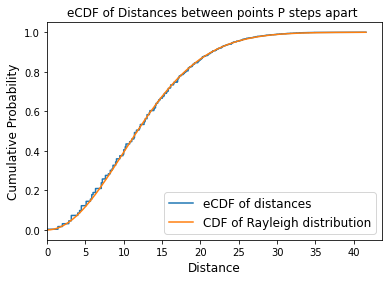

In [16]:
ds = np.sort(ds) # Sorting the distance
R = np.sort(lin)
ecdf = np.arange(len(ds))/float(len(ds)) # Calculating the eCDF values
plt.plot(ds, ecdf, label="eCDF of distances")

# Plotting the CDF of the Rayleigh distribution
plt.plot(R, Rayleigh(P,lin)[2], label="CDF of Rayleigh distribution")
plt.title("eCDF of Distances between points P steps apart ") 
plt.xlabel("Distance",fontsize=12)
plt.ylabel("Cumulative Probability",fontsize=12)
plt.legend(loc="lower right",prop={'size': 12})
plt.xlim(0)
plt.show()

# Triangular lattice

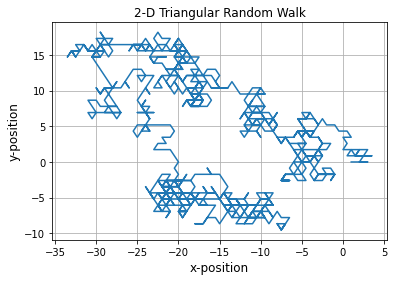

In [17]:
# Generating a 2-D random walk using a triangular lattice and plotting it
g = lattice([[1,0],[np.cos(np.pi/3), np.sin((np.pi/3))], [np.cos(2*np.pi/3), np.sin((2*np.pi/3))] ,[-1,0], [np.cos(4*np.pi/3), np.sin(4*np.pi/3)], [np.cos(5*np.pi/3), np.sin(5*np.pi/3)]],1000)
xpos = [i[0] for i in g]
ypos = [i[1] for i in g]
plt.plot(xpos,ypos)
plt.title("2-D Triangular Random Walk") 
plt.xlabel("x-position", fontsize=12)
plt.ylabel("y-position", fontsize=12)
plt.grid()
plt.show()

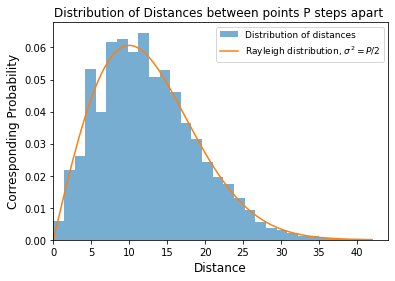

In [18]:
g = lattice([[1,0],[np.cos(np.pi/3), np.sin((np.pi/3))], [np.cos(2*np.pi/3), np.sin((2*np.pi/3))] ,[-1,0], [np.cos(4*np.pi/3), np.sin(4*np.pi/3)], [np.cos(5*np.pi/3), np.sin(5*np.pi/3)]],100000)
xpos = [i[0] for i in g]
ypos = [i[1] for i in g]
P = 200
ds = distance(xpos, ypos, P)

# Plotting the distribution of distances
plt.hist(ds, bins=30, density=True, alpha=0.6, label="Distribution of distances") 

# Plotting the PDF of the Rayleigh distribution
lin = np.linspace(0,np.max(ds),P)
plt.plot(lin, Rayleigh(P,lin)[0], label="Rayleigh distribution, $\sigma^2=P/2$")
plt.title("Distribution of Distances between points P steps apart ") 
plt.xlabel("Distance",fontsize=12)
plt.ylabel("Corresponding Probability",fontsize=12)
plt.legend(loc="upper right",prop={'size': 9})
plt.xlim(0)
plt.show()

C:\Users\joing\AppData\Local\Temp/ipykernel_19728/356698612.py:7: RuntimeWarning: invalid value encountered in double_scalars
  if np.isnan(varr/j)==True:


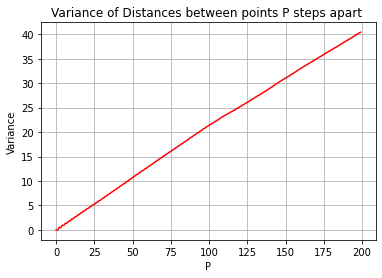

In [19]:
P = 200
variances_t = []
js = []
# Calculating the variance of the distances for different step-lengths
for j in range(P):
    varr = np.var(distance(xpos, ypos, j))
    if np.isnan(varr/j)==True:
        pass
    else:
        js.append(varr/j)
    variances_t.append(varr)

# Plotting the different variances
plt.plot(range(P),variances,'r')
plt.title("Variance of Distances between points P steps apart ") 
plt.xlabel("P")
plt.ylabel("Variance")
plt.grid()
plt.show()

# Circular random walk

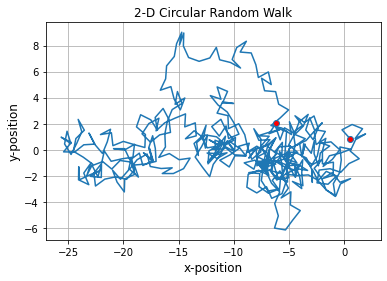

In [20]:
N = 500
X = [np.cos(np.pi*j/180) for j in range(1, 361)]
Y = [np.sin(np.pi*j/180) for j in range(1, 361)]

XY = np.column_stack((X, Y)) # Creating an array of vectors pointing at every angle
     
fu = lattice(XY,N) # Running a random walk with this vectors and plotting it
x_f = np.array(fu[:,0])
y_f = np.array(fu[:,1])
plt.plot(x_f,y_f, marker='o', markerfacecolor='red', markevery=[0,-1])
plt.title("2-D Circular Random Walk") 
plt.xlabel("x-position", fontsize=12)
plt.ylabel("y-position", fontsize=12)
plt.grid()
plt.show()

In [21]:
def kluyver(x, N):
    # Evaluating the Kluyver distribution at every given point
    I = [] 
    for j in range(len(x)-1):
        i = integrate.quad(lambda t: x[j]*t*jv(0,t*x[j])*(jv(0, t))**N, 0, np.inf) # Integrating the function with respect to t
        I.append(i)
    return np.array(I) # Returning an array with the values of the Kluyver distribution

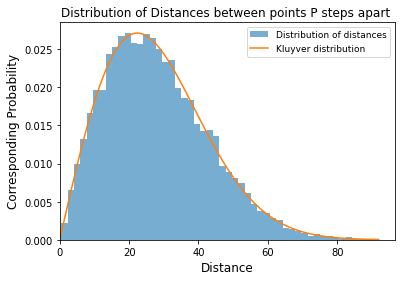

In [22]:
X = [np.cos(np.pi*j/180) for j in range(1, 361)]
Y = [np.sin(np.pi*j/180) for j in range(1, 361)]

XY = np.column_stack((X, Y))
dss = []
x_fs = []
y_fs = []
# Running 10000 circular random walks with 1000 steps
for i in range(10000):
    fu = lattice(XY,1000)
    x_f = np.array(fu[:,0])
    y_f = np.array(fu[:,1])
    dist = np.sqrt(x_f[-1]**2+y_f[-1]**2) # Finding the distance between the end point of the walk and the origin
    dss.append(dist)
    x_fs.append(x_f)
    y_fs.append(y_f)

# Plotting the distribution of distances
plt.hist(dss, bins=50, density=True, alpha=0.6, label="Distribution of distances") 

# Evaluating the Kluyver distribution of a given array and plotting the resulting values
lendss = len(dss)
lin = np.linspace(0,round(np.max(dss)),998)
k = kluyver(lin, 1000)[:,0]
lin = lin[:-1]
plt.plot(lin, k, label="Kluyver distribution")
plt.title("Distribution of Distances between points P steps apart ") 
plt.xlabel("Distance",fontsize=12)
plt.ylabel("Corresponding Probability",fontsize=12)
plt.legend(loc="upper right",prop={'size': 9})
plt.xlim(0)
plt.show()

# Self-Avoiding random walk

In [23]:
rng = np.random.default_rng()

def test(N):
    vecs = [[1,0],[-1,0],[0,1],[0,-1]]
    positions = [[0,0]] # Array of positions
    steps = []
    for i in range(N):
        val = random.choice(vecs) # Picking a vector
        steps.append(val)
        positions = np.cumsum(steps, axis=0).tolist() # Calculating the cumulative sum of the positions
        
        if positions[-1] in positions[:-1]: # 
            steps.pop(-1) # Removing the last position if already being visited
            positions.pop(-1)
            vecs.pop(vecs.index(val))# Removing the vector used
            if len(vecs)==0: # Checking if there are any allowed vectors
                vecs = [[1,0],[-1,0],[0,1],[0,-1]]
                break
            
        else:
            vecs = [[1,0],[-1,0],[0,1],[0,-1]]  # Resetting the vectors
            
       
    return np.array(positions) # Returning an array with the position at each step


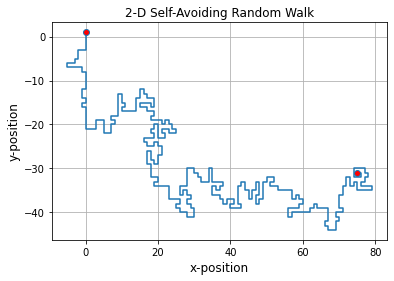

In [24]:
distances = [0]
# Running a SAW until an Euclidean distance of at least 80 is achieved
while np.max(distances)<80:
    tes = test(1000)
    distanc = np.max(np.sqrt((tes[:,0])**2+(tes[:,1])**2))
    distances.append(distanc)

# Plotting the SAW
plt.plot(tes[:,0],tes[:,1], marker='o', markerfacecolor='red', markevery=[0,-1])
plt.title("2-D Self-Avoiding Random Walk") 
plt.xlabel("x-position", fontsize=12)
plt.ylabel("y-position", fontsize=12)
plt.grid()
plt.show()

In [26]:
S = 200
vecs = [[1,0],[-1,0],[0,1],[0,-1]]
vars_s = []

for i in range(4, S):
    samples_ds = [] # List containing the samples
    positions = [[0,0]] # Initial position
    path = None
    d = True # Dummy parameter
    while d == True:
        positions = [[0,0]]
        path = None
        while True:
            step = random.choice(vecs) # Picking a vector
            positions.append(step)
            path = np.cumsum(positions, axis=0).tolist() # Calculating the cumulative sum of the positions
            if path[-1] in path[:-1]:
                path.pop(-1) # Removing the last position if already being visited
                positions.pop(-1)
                vecs.pop(vecs.index(step)) # Removing the vector used
                if len(vecs) == 0: # Checking if there are any allowed vectors
                    vecs = [[1,0],[-1,0],[0,1],[0,-1]]
                    break
            else:
                vecs = [[1,0],[-1,0],[0,1],[0,-1]] # Resetting the vectors
                
            if len(path) == i: # Checking if the desired length of the walk is achieved
                #print(len(path))
                path = np.array(path)
                x_saw = path[:,0]
                y_saw = path[:,1]
                dst = np.sqrt((x_saw[0]-x_saw[-1])**2+(y_saw[0]-y_saw[-1])**2) # Calculating the distance
                samples_ds.append(dst)
            
            if len(samples_ds) == S: # Checking if the desired number of samples is reached
                vars_s.append(np.var(samples_ds))
                d = False         
                break

0.05790268384555709


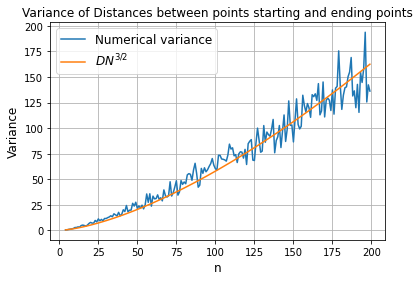

In [27]:
# Calculate D
ns = []
for n in range(4,S):
    ns.append(n)
ns = np.array(ns)

# Finding the constant of proportionality between the variance and N
D = np.sum((ns)**(3/2)*vars_s)/np.sum(ns**3)
print(D)

plt.plot(range(4,S), vars_s, label="Numerical variance")
plt.plot(ns, D*ns**(3/2), label="$DN^{3/2}$")
plt.title("Variance of Distances between points starting and ending points") 
plt.xlabel("n", fontsize=12)
plt.ylabel("Variance", fontsize=12)
plt.legend(loc="upper left",prop={'size': 12})
plt.grid()
plt.show()

# Polya's recurrence theorem

In [28]:
N = 1000

In [29]:
# Defining a function which verifies if a random walk returns to the origin
def step_counterx(poss):
    n_steps = 0
    for i in range(len(poss)):
        if poss[:,0][i] == 0 and poss[:,1][i] == 0 and poss[:,2][i] == 0:# Check if the RW has returned to the origin
            n_steps = 1
            break
        else:
            pass
    return n_steps # Returning 1 if the RW returned at least once, 0 otherwise

# Defining a function which counts how many times the walker returns to the origin
def step_countere(poss):
    n_steps = []
    for i in range(len(poss)):
        if poss[:,0][i] == 0 and poss[:,1][i] == 0 and poss[:,2][i] == 0: # Check if the RW has returned to the origin
            n_steps.append(1)
            continue
        else:
            pass 
    return np.sum(n_steps) # Returning the number of returns 

In [30]:
n_walks = 1000
n_trials = 1000

# Running n_trials RWs for every step between 0 and n_walks
means1dx = []
for j in range(n_walks):
    max_s = j
    sts1 = []
    for t in range(n_trials):
        poss = lattice([[1,0,0],[-1,0,0]], max_s)
        sts1.append(step_counterx(poss)) # Check if the RW has returned to the origin
    means1dx.append(np.mean(sts1))
    

means2dx = []
for j in range(n_walks):
    max_s = j
    sts2 = []
    for t in range(n_trials):
        poss = lattice([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0]], max_s)
        sts2.append(step_counterx(poss))
    means2dx.append(np.mean(sts2))

means3dx = []
for j in range(n_walks):
    max_s = j
    sts3 = []
    for t in range(n_trials):
        poss = lattice([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]], max_s)
        sts3.append(step_counterx(poss))
    means3dx.append(np.mean(sts3))


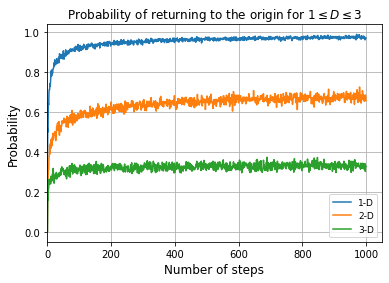

In [31]:
# Plotting the probabilities for each dimension
plt.plot(range(n_walks), means1dx, label='1-D')
plt.plot(range(n_walks), means2dx, label='2-D')
plt.plot(range(n_walks), means3dx, label='3-D')
plt.title("Probability of returning to the origin for $1\leq D \leq 3$") 
plt.xlabel("Number of steps",fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.legend(loc="lower right",prop={'size': 9})
plt.xlim(0)
plt.grid()
plt.show()

In [32]:
print(np.sum(means3dx)/len(means3dx)) # Value to which the 3-D plot tends

0.322816


In [33]:
n_walks = 80
n_trials = 2000

# Running n_trials RWs for every step between 0 and n_walks
means1d = []
for j in range(n_walks):
    max_s = j
    sts1 = []
    for t in range(n_trials):
        poss = lattice([[1,0,0],[-1,0,0]], max_s) # Returning the number of returns 
        sts1.append(step_countere(poss))
    means1d.append(np.mean(sts1))
    

means2d = []
for j in range(n_walks):
    max_s = j
    sts2 = []
    for t in range(n_trials):
        poss = lattice([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0]], max_s)
        sts2.append(step_countere(poss))
    means2d.append(np.mean(sts2))

means3d = []
for j in range(n_walks):
    max_s = j
    sts3 = []
    for t in range(n_trials):
        poss = lattice([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]], max_s)
        sts3.append(step_countere(poss))
    means3d.append(np.mean(sts3))

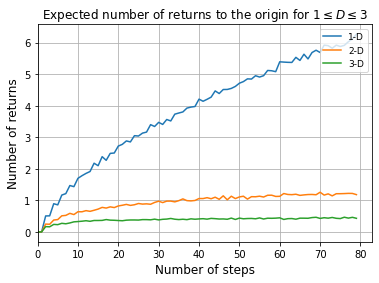

In [34]:
# Plotting the expected number of returns for each dimension
plt.plot(range(n_walks), means1d, label='1-D')
plt.plot(range(n_walks), means2d, label='2-D')
plt.plot(range(n_walks), means3d, label='3-D')
plt.legend(loc=2)
plt.title("Expected number of returns to the origin for $1\leq D \leq 3$") 
plt.xlabel("Number of steps",fontsize=12)
plt.ylabel("Number of returns",fontsize=12)
plt.legend(loc="upper right",prop={'size': 9})
plt.xlim(0)
plt.grid()
plt.show()

In [35]:
print(np.sum(means3d)/len(means3d)) # Value to which the 3-D plot tends

0.38071875
